# Flux Traces Preprocessing

In [8]:
import numpy as np
from pathlib import Path

In [9]:
FILE_PATH: Path = Path(".").parent.resolve() / "flux" / "raw" / "fluxes_0.dat"
FILE_PATH

WindowsPath('C:/Users/sever/code/academics/master/fusiontimeseries/data/flux/raw/fluxes_0.dat')

In [10]:
from functools import cache
import os


RAW_FLUX_DATA_PATH: Path = Path(".").parent.resolve() / "flux" / "raw"
flux_trace_filenames: list[str] = os.listdir(RAW_FLUX_DATA_PATH)
NR_FLUX_TRACES: int = len(flux_trace_filenames)
FLUXTRACE_FILENAME_CONVENTION: str = "fluxes_{iteration}.dat"


@cache
def load_flux_data(idx: int) -> np.ndarray:
    file_path: Path = RAW_FLUX_DATA_PATH / FLUXTRACE_FILENAME_CONVENTION.format(
        iteration=idx
    )
    data: np.ndarray = np.loadtxt(file_path)
    return data

In [11]:
# Nr Flux traces
print(
    len(
        list(
            (Path(".").parent.resolve() / "flux" / "raw")
            .glob("fluxes_*.dat")
        )
    )
)

301


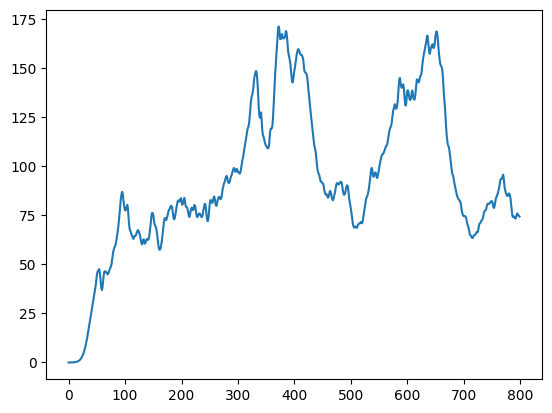

In [24]:
from matplotlib import pyplot as plt

data: np.ndarray = load_flux_data(280)
xtime = np.arange(data.shape[0])
plt.plot(xtime, data[:, 1])

In [13]:
from tqdm import tqdm


min_flux_value: list[float] = []
max_flux_value: list[float] = []

for idx in tqdm(range(0, 100)):
    data = load_flux_data(idx)
    min_flux_value.append(np.min(data[:, 1]))
    max_flux_value.append(np.max(data[:, 1]))

100%|██████████| 100/100 [00:00<00:00, 1604.08it/s]


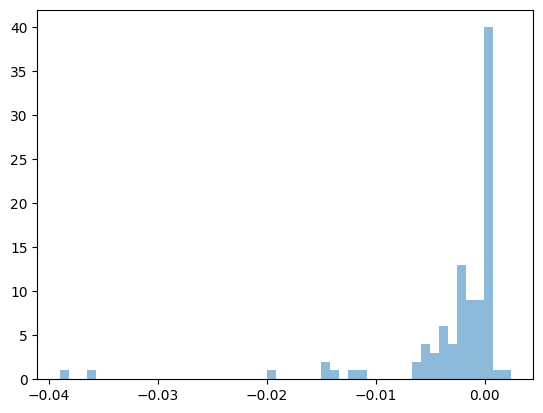

In [14]:
plt.hist(min_flux_value, bins=50, alpha=0.5, label="Min Flux Values")
plt.show()

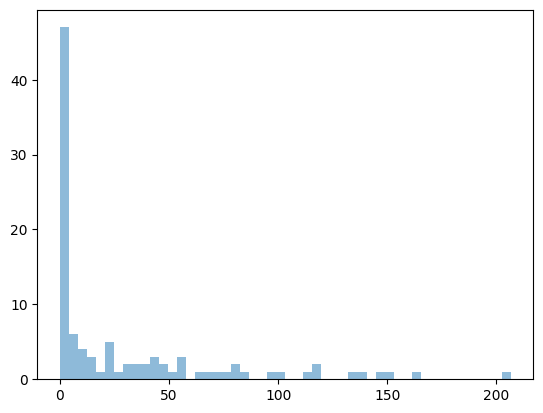

In [15]:
plt.hist(max_flux_value, bins=50, alpha=0.5, label="Max Flux Values")
plt.show()

In [14]:
[val.__float__() for val in min_flux_value]

[-0.00145687,
 -0.0147392,
 -3.50588e-05,
 -0.00211325,
 -0.0117513,
 -1.4395e-05,
 3.55647e-12,
 -0.00206922,
 -2.54973e-05,
 -0.000816144,
 -0.0148522,
 7.3119e-06,
 -0.00111496,
 -0.000157131,
 0.000101307,
 0.000247839,
 -0.0140213,
 -7.03507e-05,
 -0.00353729,
 -0.00318513,
 0.000126729,
 9.34207e-05,
 -0.00199035,
 -1.88307e-05,
 -0.00224702,
 -0.0360016,
 -4.3004e-05,
 -0.00186883,
 -0.00583294,
 0.0,
 -0.000786145,
 -0.0389568,
 8.33714e-07,
 -3.54523e-05,
 -0.00487727,
 -2.84606e-05,
 -6.99069e-05,
 -0.0060625,
 -2.58401e-05,
 0.00238248,
 -0.00218699,
 1.32518e-05,
 -0.00210132,
 -0.00476058,
 -1.10564e-05,
 -0.00366981,
 -0.00195233,
 1.09172e-05,
 -0.00275153,
 -0.0112143,
 -7.15945e-05,
 -0.00535055,
 -0.00362393,
 -6.3924e-05,
 0.000502966,
 -0.00152745,
 -0.000165418,
 -0.00110425,
 -0.0196736,
 1.74013e-06,
 -0.00383922,
 -0.00425984,
 8.54201e-06,
 -0.000281325,
 -0.00315764,
 -0.000190638,
 -0.000146345,
 -0.00580862,
 -4.90414e-05,
 -0.00153693,
 -0.00224684,
 -0.000